In [63]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import PIL as Image
import statistics

In [2]:
file="E:\\image processing\\subset_1_of_subset_0_of_S1B_IW_GRDH_1SDV_20190511T004502_20190511T004527_016189_01E771_0C8B.tif"
img=gdal.Open(file)

In [3]:
img1=img.GetRasterBand(1)
data=img1.ReadAsArray()


In [4]:
np.array(data)

array([[ 64.,  70.,  74., ...,  59.,  49.,  57.],
       [ 82.,  97.,  95., ...,  44.,  60.,  61.],
       [ 84.,  97., 103., ...,  41.,  67.,  55.],
       ...,
       [ 79.,  80.,  64., ...,  54.,  45.,  47.],
       [101.,  98.,  78., ...,  93.,  89.,  67.],
       [ 95., 111., 118., ...,  84.,  82.,  58.]], dtype=float32)

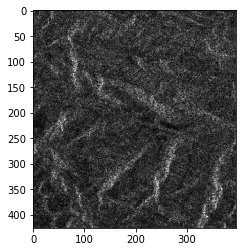

In [5]:
plt.imshow((data),Cmap='gray')

In [66]:
x=data.max()
y=data.min()
z=data.shape
print(x,y,z)
kernal_size=int(3)
padding=np.zeros((data.shape[0]+indexer*2,data.shape[1]+indexer*2))
#variance
c =np.var(data)
print(c)

368.0 15.0 (426, 397)
1053.4445


In [51]:
def median_filter(data,kernal_size):
    indexer=kernal_size//2
    padding=np.zeros((data.shape[0]+indexer*2,data.shape[1]+indexer*2))
    padding[indexer:padding.shape[0]-indexer*2+1,indexer:padding.shape[1]-indexer*2+1]=data
    for i in range(indexer,padding.shape[0]-indexer+1):
        for j in range(indexer,padding.shape[1]-indexer+1):
            padding[i,j]=np.median(padding[i-indexer:i+indexer+1,j-indexer:j+indexer+1])
    return padding
    

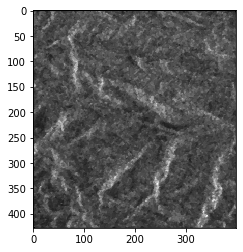

In [59]:
medfil=median_filter(data,3)
plt.imshow((medfil),Cmap='gray')